# Tâche 7 : el_bands

Analysez la structure des bandes électroniques du matériau qui vous a été attribué en :
- déterminant la bande interdite
- trouvant la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion 
- calculant la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

## 0. Récupération de la structure des bandes électroniques du ZrCoBi

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors

mp_key = "XmhOs3iaP3YopOzhwHSd0LHcduZB1r1h"
mp_id = "mp-31451"
material_name = "ZrCoBi"

# Récupération de la structure des bandes électroniques
with MPRester(mp_key) as m:
    band = m.get_bandstructure_by_material_id(mp_id)
    bplot = BSPlotter(band)
    data = bplot.bs_plot_data()
    fig_el_bs = get_plot_bs(band, plot_range=[-6,5])
    fig_el_bs.show()

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## 1. Bande interdite

{'direct': False, 'energy': 0.9771999999999998, 'transition': 'L-X'}


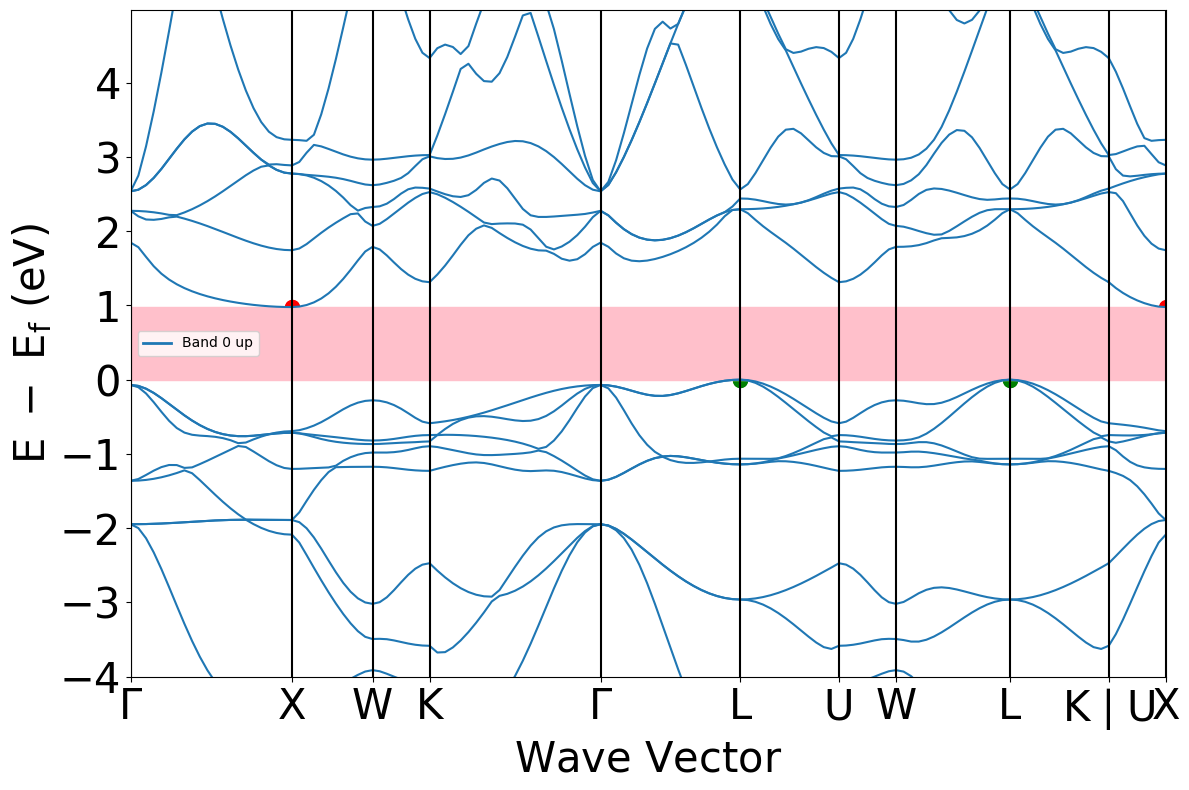

In [13]:
bplot.get_plot(vbm_cbm_marker = True)
D = data.get('ticks').get('distance')

# Affichage de la bande interdite
plt.fill_between(np.linspace(D[0], D[-1], 500), 0, band.get_band_gap().get('energy'), color = "pink")

# Récupération des informations sur la bande interdite
print(band.get_band_gap())

Par définition, la bande interdite d'un matériau (gap), est l'intervalle entre la dernière bande de valence et la première bande de conduction, dans lequel la densité d'états électroniques est nulle. Elle est représentée par la bande rose sur le graphe ci-dessus.

La bande interdite du ZrCoBi est "indirecte". En effet, les extremums des bandes de conduction (points rouges) et les extremums des bandes de valance (points verts) ne sont pas alignés verticalement.

La largeur de bande interdite correspond à l'énergie qu'un électron doit acquérir pour passer de la bande de valence à la bande de conduction. L'amplitude de cette largeur nous indique donc si un matériau est un bon conducteur ou non. Pour le ZrCoBi, l'amplitude de la bande interdite est de +/- 0,97 eV < 4 eV, il s'agit donc d'un (semi)conducteur d'électricité.

La transition est la direction de propagation du vecteur d'onde dans la bande interdite. Pour le ZrCoBi, elle se fait suivant une direction L-X.


## 2. Dispersion

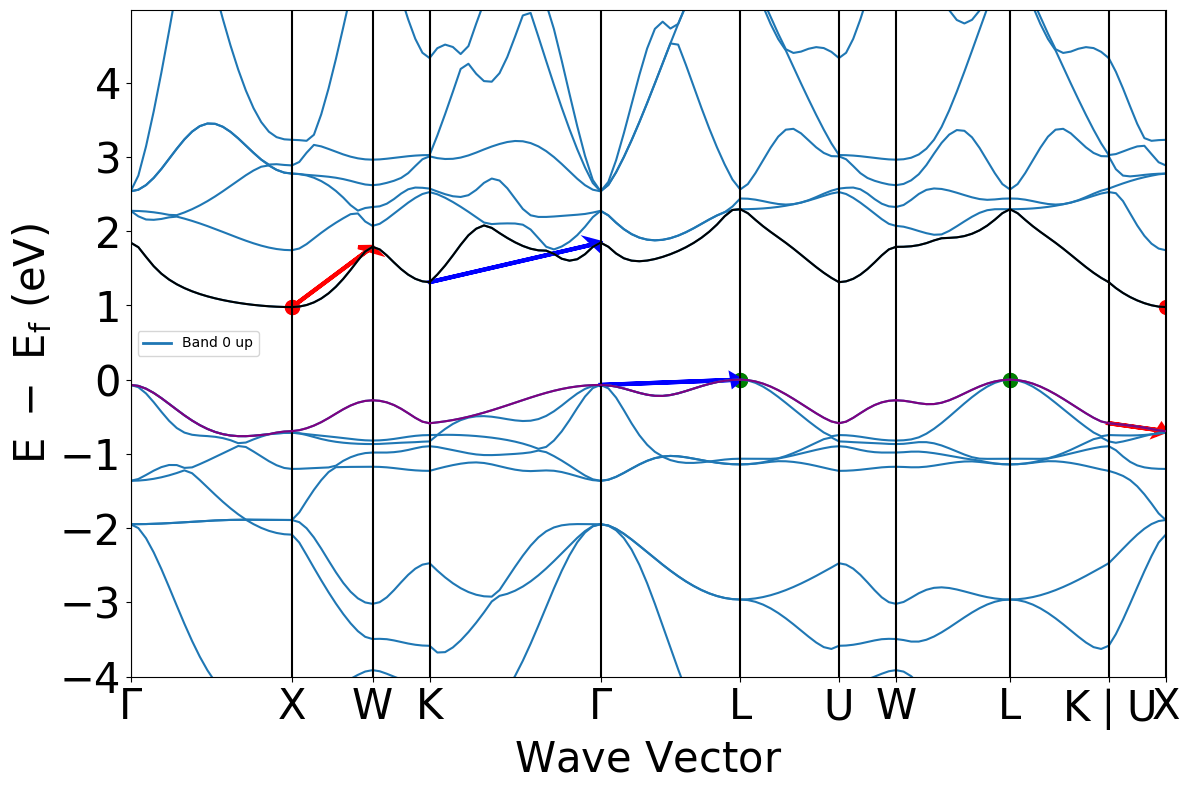

In [14]:
# Récupération des données
pl = bplot.get_plot(vbm_cbm_marker = True)
E = data.get('energy').get('1')
D = data.get('ticks').get('distance')

# Récupération de l'indice la dernière bande de valence et de l'indice la première bande de conduction
vbm = band.get_vbm()
cbm = band.get_cbm()
Vindex = 12
Cindex = 13

# Calcul des pentes des 2 courbes pour chaque chemin
slopeV = np.zeros(10)
slopeC = np.zeros(10)
Dbranch = np.unique(D) 

for i in range(10):
    DeltaD = Dbranch[i+1]-Dbranch[i]
    slopeV[i] = abs(((E[i][Vindex])[-1] - (E[i][Vindex])[0])/(DeltaD) )
    slopeC[i] = abs(((E[i][Cindex])[-1] - (E[i][Cindex])[0])/(DeltaD) )

# Calcul des min (bleu) et max (rouge) des pentes
maxV = np.max(slopeV) #indice 9
minV = np.min(slopeV) #indice 4

maxC = np.max(slopeC) #indice 1
minC = np.min(slopeC) #indice 3

# Afficher la dernière bande de valence et la première bande de conduction 
distances = data.get('distances')
for i in range(len(distances)):
    plt.plot(distances[i],E[i][12],'purple')
    plt.plot(distances[i],E[i][13],'black')

# Afficher les directions des dispersions
plt.arrow(Dbranch[9], (E[9][Vindex])[0],Dbranch[10] - Dbranch[9], (E[9][Vindex])[-1] - (E[9][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(Dbranch[4], (E[4][Vindex])[0], Dbranch[5] -Dbranch[4], (E[4][Vindex])[-1] - (E[4][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.arrow(Dbranch[1], (E[1][Cindex])[0], Dbranch[2] - Dbranch[1], (E[1][Cindex])[-1] - (E[1][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(Dbranch[3], (E[3][Cindex])[0], Dbranch[4] - Dbranch[3], (E[3][Cindex])[-1] - (E[3][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
    
plt.show()

La direction dans laquelle une bande présente le plus de dispersion est donnée par la pente maximum de la courbe $E(k)$ de cette bande pour chaque chemin. Le moins de dispersion est donnée par le minimum.

Sur le graphe, la première bande de conduction est en noir et la dernière bande de valence en mauve. La direction dans laquelle une bande présente le plus de dispersion est représentée par une flèche rouge et la direction dans laquelle une bande présente le moins de dispersion est représentée par une flèche bleue. 

## 3. Masse effective

In [15]:
hbar = 6.5821e-16

# Au sommet de la dernière bande de valence et à la base de la première bande de conduction respectivement

# Coordonnées du vecteur k
kpoint_vbm = vbm["kpoint"].cart_coords
kpoint_cbm = cbm["kpoint"].cart_coords

# Norme du vecteur k
norm_k_vbm = np.linalg.norm(kpoint_vbm)
norm_k_cbm = np.linalg.norm(kpoint_cbm)

# Masse effective 
masse_vbm = (hbar**2 * norm_k_vbm**2) / (2 * vbm["energy"])
masse_cbm = (hbar**2 * norm_k_cbm**2) / (2 * cbm["energy"])


print("Masse effective au sommet de la dernière bande de valence :", masse_vbm, "[kg]")
print("Masse effective à la base de la première bande de conduction :", masse_cbm, "[kg]")

Masse effective au sommet de la dernière bande de valence : 2.82771973102766e-32 [kg]
Masse effective à la base de la première bande de conduction : 3.229140220729676e-32 [kg]


Les électrons peuvent être décrits comme des particules libres dont la masse effective $m^*$ varie (peut être positive/négative, supérieure/inférieure à $m_e$).

La masse effective $m^*$ est donnée par : $m^* = \frac{ℏ^2}{(\frac{∂^2 E}{∂k^2})}$ (où ℏ est la constante de Planck réduite).

En supposant une dispersion $E(k)$ parabolique, on a : $E(k) = ak^2 + bk + c$   (et donc : $\frac{∂^2 E}{∂k^2} = 2a$) 

Enfin, $m^* = \frac{ℏ^2}{2a} = \frac{ℏ^2 . |k|^2}{2E}$

Les masses effectives trouvées sont relativement proches de la masse de l'électron : $m_e = 9,1 e-31 $ [kg]